In [1]:
!pip install -U finance-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import FinanceDataReader as fdr

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

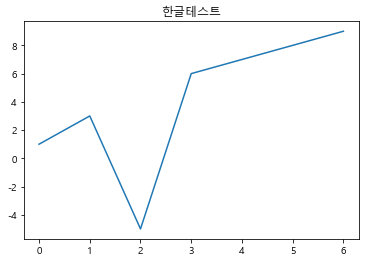

In [3]:
pd.Series([1, 3, -5, 6, 7, 8, 9]).plot(title='한글테스트')

In [4]:
'''
제약업종
https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

2차전지
https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
'''

'\n제약업종\nhttps://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261\n\n2차전지\nhttps://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64\n'

In [5]:
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64'

In [6]:
'''
Pandas 의 read_html() 함수로 dataset 수집하기
'''
table = pd.read_html(url, encoding='cp949')
print(type(table))
print(len(table))

<class 'list'>
3


In [7]:
print(table[0])

           업종명    전일대비 전일대비 등락현황                   등락그래프
           업종명    전일대비        전체    상승    보합    하락 등락그래프
0  2차전지  테마 개요  +0.29%     123.0  57.0  10.0  56.0    4%
1          NaN     NaN       NaN   NaN   NaN   NaN   NaN
2          NaN     NaN       NaN   NaN   NaN   NaN   NaN


In [8]:
print(table[1])

     0      1          2        3          4       5
0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%)


In [9]:
# 필요한 data 가 있는 부분
print(table[2])

          종목명     종목명.1      현재가     전일비      등락률     매수호가     매도호가  \
0         NaN       NaN      NaN     NaN      NaN      NaN      NaN   
1    세아메카닉스 *  테마 편입 사유   6820.0   860.0  +14.43%   6820.0   6830.0   
2       파워넷 *  테마 편입 사유   4720.0   480.0  +11.32%   4720.0   4725.0   
3        이수화학  테마 편입 사유  52500.0  4800.0  +10.06%  52500.0  52600.0   
4     나라엠앤디 *  테마 편입 사유   8610.0   670.0   +8.44%   8610.0   8620.0   
..        ...       ...      ...     ...      ...      ...      ...   
118     TCC스틸  테마 편입 사유  21650.0  1100.0   -4.84%  21600.0  21650.0   
119    켐트로스 *  테마 편입 사유   9850.0   520.0   -5.01%   9850.0   9860.0   
120      DI동일  테마 편입 사유  24500.0  1350.0   -5.22%  24450.0  24500.0   
121       NaN       NaN      NaN     NaN      NaN      NaN      NaN   
122       NaN       NaN      NaN     NaN      NaN      NaN      NaN   

            거래량      거래대금       전일거래량  토론실  Unnamed: 11  
0           NaN       NaN         NaN  NaN          NaN  
1    10485494.0   66999.0   213

In [10]:
'''
필요한 data 는 table[2] 에 있고
dropna() 를 호출해서 결측치를 제거함
how='all' 로 설정하면 전부 결측치인 경우
row 나 column 을 삭제함
'''
raw = table[2]
print(type(raw))
print(raw.shape)
print(raw.shape[0])
# raw.head()

<class 'pandas.core.frame.DataFrame'>
(123, 12)
123


In [11]:
# 결측치가 있는 행 삭제하기
raw = raw.dropna(axis=0,how='all')
print(type(raw))
print(raw.shape)
raw.head()

<class 'pandas.core.frame.DataFrame'>
(120, 12)


,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 11
1,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0,NaN,NaN
2,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0,NaN,NaN
3,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0,NaN,NaN
4,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0,NaN,NaN
5,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0,NaN,NaN


In [12]:
# 결측치가 있는 열 삭제하기
raw = raw.dropna(axis=1, how='all')
print(type(raw))
print(raw.shape)
raw.head()

<class 'pandas.core.frame.DataFrame'>
(120, 10)


,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0
2,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0
3,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0
4,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0
5,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0


In [13]:
'''
위의 두 셀을 한 번에 실행하기
결측치가 있는 행과 열 한꺼번에 삭제하기
'''
raw = raw.dropna(axis=0,how='all').dropna(axis=1, how='all')
print(type(raw))
print(raw.shape)
raw.head()

<class 'pandas.core.frame.DataFrame'>
(120, 10)


,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0
2,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0
3,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0
4,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0
5,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0


In [14]:
'''
파생변수(컬럼) - 기존의 컬럼을 가공해서 새로운 컬럼을 만듬
'''

# 날짜 정보를 조회해서 DataFrame 에 기록하기
# today() 함수 : 현재 시스템의 날짜, 시간 정보를 반환함
import datetime
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
print(today)

2023-03-24 23:19:24.344485
2023-03-24


In [15]:
'''
조회일자 컬럼 추가하기
'''
raw['조회일자'] = today
raw.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0,2023-03-24
2,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0,2023-03-24
3,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0,2023-03-24
4,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0,2023-03-24
5,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0,2023-03-24


In [16]:
'''
종목명대비 거래량과 거래대금 시각화하기
'''
print(raw.columns)


'''
종목명, 거래량 시각화하기
'''
raw_tmp = raw[['종목명', '거래량']]
raw_tmp.head()
raw_tmp = raw_tmp.sort_values('거래량')
raw_tmp.head(20)                      

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자'],
      dtype='object')


,종목명,거래량
63,명성티엔에스 *,0.0
62,한송네오텍 *,0.0
61,엘아이에스 *,0.0
27,아이티엠반도체 *,23068.0
15,이노메트리 *,24994.0
21,솔브레인 *,29279.0
38,탑엔지니어링 *,30145.0
97,대한유화,39392.0
99,테이팩스,46611.0
98,고려아연,50092.0


In [17]:
'''
종목명 컬럼을 index 로 내림
'''
raw_tmp = raw_tmp.set_index('종목명')
raw_tmp.head(20)  

,거래량
종목명,
명성티엔에스 *,0.0
한송네오텍 *,0.0
엘아이에스 *,0.0
아이티엠반도체 *,23068.0
이노메트리 *,24994.0
솔브레인 *,29279.0
탑엔지니어링 *,30145.0
대한유화,39392.0
테이팩스,46611.0


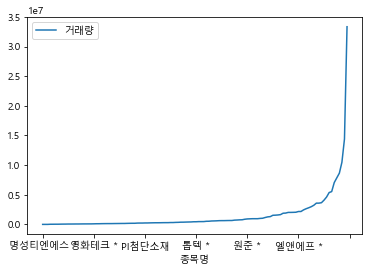

In [18]:
raw_tmp.plot()

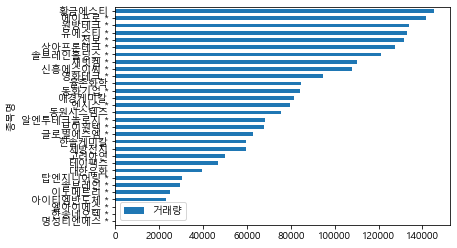

In [19]:
raw_tmp.head(30).plot.barh()

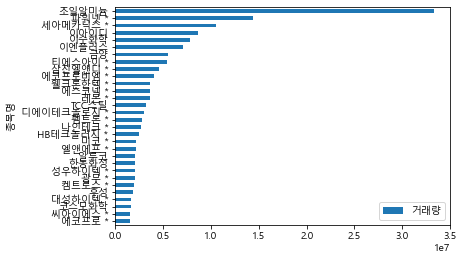

In [20]:
raw_tmp.tail(30).plot.barh()

In [21]:
'''
종목명, 거래대금 시각화하기
'''
raw_tmp2 = raw[['종목명', '거래대금']]
raw_tmp2.head()
'''
종목명 컬럼을 index 로 내리기
'''
raw_tmp2 = raw_tmp2.set_index('종목명')
raw_tmp2.head()

,거래대금
종목명,
세아메카닉스 *,66999.0
파워넷 *,66710.0
이수화학,410478.0
나라엠앤디 *,7175.0
삼진엘앤디 *,14036.0


In [22]:
raw_tmp2 = raw_tmp2.sort_values('거래대금')
raw_tmp2.tail(30) 

,거래대금
종목명,
천보 *,29715.0
SKC,29995.0
하나기술 *,31899.0
레몬 *,37836.0
일진머티리얼즈,41661.0
대주전자재료 *,43249.0
한농화성,43761.0
이엔플러스,47745.0
미래컴퍼니 *,56573.0


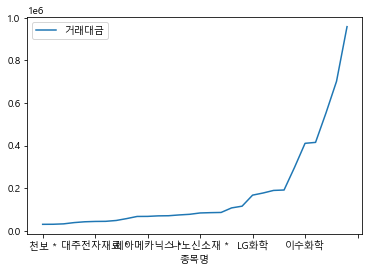

In [23]:
raw_tmp2.tail(30).plot()

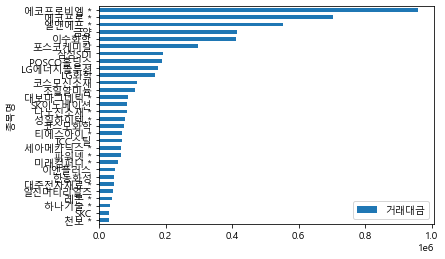

In [24]:
raw_tmp2.tail(30).plot.barh()

In [25]:
raw['종목명_전처리'] = raw['종목명'].str.replace('*', '')
raw['종목명_전처리'] = raw['종목명_전처리'].str.strip()
raw['종목명_전처리'][:10] 
raw['종목명_전처리'].head(10)
raw[['종목명','종목명_전처리']].head(10)
raw.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목명_전처리'],
      dtype='object')

In [26]:
# 종목명전처리 컬럼 이 추가된 경우,
# 종목명전처리 컬럼 삭제하기
# raw = raw.drop('종목명전처리', axis=1)
raw.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목명_전처리'],
      dtype='object')

In [27]:
krx_df = fdr.StockListing('KRX')
krx_df.shape

(2708, 17)

In [28]:
krx_df.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,63000,1,700,1.12,62700,63300,62300,18278602,1147804584500,376096300650000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,569000,2,-6000,-1.04,577000,578000,556000,317648,179941076000,133146000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87300,2,-1200,-1.36,89100,90700,86700,4670908,412119310916,63554606464500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,797000,2,-1000,-0.13,795000,805000,792000,28390,22648893000,56725678000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,719000,2,-27000,-3.62,741000,741000,712000,266419,192270585000,49441697070000,68764530,STK


In [29]:
'''
DataFrame 을 csv 파일로 저장하기
'''
print(today)

file_name = f'krx_{today}_raw.csv'
krx_df.to_csv(file_name, index=False)
print(file_name)

2023-03-24
krx_2023-03-24_raw.csv


In [30]:
krx_df = pd.read_csv('krx_2022-12-17_raw.csv', encoding='cp949')
krx_df.shape

(2683, 17)

In [31]:
'''
DataFrame 연결하기

concat()
  axis=0 : 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어붙여서 결합함
  axis=1 : 열을 기준으로 좌우로 같은 컬럼끼리 값을 이어붙여서 결합함

merge()
  index 나 특정 컬럼값을 기준으로 두 개의 DataFrame 을 연결함
'''

'\nDataFrame 연결하기\n\nconcat()\n  axis=0 : 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어붙여서 결합함\n  axis=1 : 열을 기준으로 좌우로 같은 컬럼끼리 값을 이어붙여서 결합함\n\nmerge()\n  index 나 특정 컬럼값을 기준으로 두 개의 DataFrame 을 연결함\n'

In [32]:
krx_df.columns
'''
'Code' : 종목코드
'Name' : 종목명
'Code' 와 'Name' 만 사용하고자
이 두 컬럼을 추출해서 item_code_name_df 변수에 연결함
'Code' -> 종목코드, 'Name' -> 종목명_전처리 로 컬럼이름 변경하기
'''
item_code_name_df = krx_df[['Code', 'Name']]
item_code_name_df.shape
item_code_name_df.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,207940,삼성바이오로직스
3,000660,SK하이닉스
4,006400,삼성SDI


In [33]:
# 'Code' -> 종목코드, 'Name' -> 종목명_전처리 로 컬럼이름 변경하기
item_code_name_df.columns = ['종목코드','종목명_전처리']
item_code_name_df.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,373220,LG에너지솔루션
2,207940,삼성바이오로직스
3,000660,SK하이닉스
4,006400,삼성SDI


In [34]:
'''
raw = raw.dropna(axis=0,how='all').dropna(axis=1, how='all')
print(type(raw))
print(raw.shape)
raw.head()  

raw 에 있는 종목갯수 확인하기
  ㄴ 결측치가 있는 행과 열을 삭제한 DataFrame
'''
raw.shape
raw.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목명_전처리'],
      dtype='object')

In [35]:
'''
DataFrame 의 merge() 메소드를 호출해서

종목코드를 만들기 위해서
종목명_전처리 컬럼을 기준으로 
item_code_name_df DataFrame 과 병합하기

merge() 메소드의 파라미터
on='종목명_전처리' : 병합 기준 컬럼
how='left : 결합방법 

how에 설정하는 값 - inner, outer, left, right
inner - SQL 의 inner join
outer - SQL 의 outer join
left  - SQL 의 left outer join
right - SQL 의 right outer join
'''
merge_df = raw.merge(item_code_name_df, on='종목명_전처리', how='left')
merge_df.shape

(120, 13)

In [36]:
pd.set_option('display.max_rows', 1000)

In [37]:
merge_df

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0,2023-03-24,세아메카닉스,396300
1,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0,2023-03-24,파워넷,037030
2,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0,2023-03-24,이수화학,005950
3,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0,2023-03-24,나라엠앤디,051490
4,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0,2023-03-24,삼진엘앤디,054090
5,나인테크 *,테마 편입 사유,3695.0,255.0,+7.41%,3695.0,3700.0,2639344.0,9498.0,1042525.0,2023-03-24,나인테크,267320
6,엘앤에프 *,테마 편입 사유,268000.0,18000.0,+7.20%,267500.0,268000.0,2172317.0,553937.0,2584650.0,2023-03-24,엘앤에프,066970
7,톱텍 *,테마 편입 사유,9950.0,500.0,+5.29%,9940.0,9950.0,444514.0,4367.0,327931.0,2023-03-24,톱텍,108230
8,금양,테마 편입 사유,75900.0,3700.0,+5.12%,75900.0,76000.0,5533767.0,414810.0,14169172.0,2023-03-24,금양,001570
9,티에스아이 *,테마 편입 사유,12420.0,570.0,+4.81%,12410.0,12420.0,5369016.0,70081.0,3181296.0,2023-03-24,티에스아이,277880


In [38]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      120 non-null    object 
 1   종목명.1    120 non-null    object 
 2   현재가      120 non-null    float64
 3   전일비      120 non-null    float64
 4   등락률      120 non-null    object 
 5   매수호가     120 non-null    float64
 6   매도호가     120 non-null    float64
 7   거래량      120 non-null    float64
 8   거래대금     120 non-null    float64
 9   전일거래량    120 non-null    float64
 10  조회일자     120 non-null    object 
 11  종목명_전처리  120 non-null    object 
 12  종목코드     116 non-null    object 
dtypes: float64(7), object(6)
memory usage: 13.1+ KB


In [39]:
merge_df.describe()

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량
count,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,1.200000e+02
mean,66055.141667,1482.950000,65912.275000,66014.575000,1.518771e+06,50909.633333,3.251381e+06
std,128191.529558,3805.034963,128147.075726,128343.564926,3.644148e+06,131996.287273,1.063833e+07
min,472.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,7367.500000,73.750000,6810.000000,6820.000000,1.490940e+05,2902.750000,2.607018e+05
50%,16905.000000,385.000000,16900.000000,16920.000000,4.433355e+05,9116.500000,7.346905e+05
75%,53725.000000,1012.500000,53650.000000,53775.000000,1.367255e+06,29208.750000,2.148223e+06
max,719000.000000,27000.000000,718000.000000,719000.000000,3.334572e+07,958851.000000,1.108407e+08


In [40]:
'''
종목 상세 정보 
'''
# 일부 종목 수집해 보기
item_code = '068270'
item_name = '셀트리온'

In [41]:
item_url = f'https://finance.naver.com/item/main.nhn?code={item_code}'

In [42]:
tables = pd.read_html(item_url, encoding='cp949')
print(type(tables))
print(len(tables))

<class 'list'>
13


In [43]:
tables[0]

,0,1,2
0,"전일 154,500 154,500","고가 156,700156,700 (상한가 200,500200,500 )","거래량 364,759 364,759"
1,"시가 153,500153,500","저가 153,100153,100 (하한가 108,200 )","거래대금 56,281 56,281 백만"


In [44]:
for idx, table in enumerate(tables):
    # print(type(table))
    print(f'[{idx}]')
    display(table)
    print('-' * 60)

[0]


,0,1,2
0,"전일 154,500 154,500","고가 156,700156,700 (상한가 200,500200,500 )","거래량 364,759 364,759"
1,"시가 153,500153,500","저가 153,100153,100 (하한가 108,200 )","거래대금 56,281 56,281 백만"


------------------------------------------------------------
[1]


,매도상위,거래량,매수상위,거개량
0,NaN,NaN,NaN,NaN
1,삼성,58278.0,NH투자증권,80051.0
2,키움증권,54446.0,키움증권,63759.0
3,한국증권,36302.0,KB증권,32741.0
4,KB증권,35636.0,미래에셋증권,23940.0
5,신한투자증권,30950.0,한국증권,23327.0
6,외국계추정합,1012.0,"+15,672",16684.0


------------------------------------------------------------
[2]


,날짜,종가,전일비,외국인,기관
0,NaN,NaN,NaN,NaN,NaN
1,03/24,153600.0,하향 900,-61480,-618
2,03/23,154500.0,"하향 1,600",-17539,"+8,916"
3,03/22,156100.0,상향 100,"+20,990","+1,647"
4,03/21,156000.0,"하향 1,900",-70119,-5333
5,03/20,157900.0,"상향 1,400","+2,288","+59,776"
6,03/17,156500.0,"상향 4,900","+60,964","+58,774"
7,NaN,NaN,NaN,NaN,NaN


------------------------------------------------------------
[3]


주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2020.12   2021.12   2022.12 2023.12(E)   2021.12   2022.03   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  18491.00  18934.00  22840.00   25304.00   6037.00   5506.00   
1        영업이익   7186.00   7442.00   6472.00    7870.00   2093.00   1423.00   
2       당기순이익   5257.00   5958.00   5426.00    6295.00   1286.00   1212.00   
3       영업이익률     38.86     39.30     28.34      31.10     34.67     25.84   
4        순이익률     28.43     31.47     23.76      24.88     21.30     22.02   
5   ROE(지배주주)     17.07     16.04     13.35      13.92     16.04     13.90   
6        부채비율     46.46     40.09     37.84        NaN     40.09     45.28   
7        당좌비율    193.38    206.23    176.54        NaN    206.23    175.23   
8         유보율   2446.72   2833.54   3093.79        NaN   2833.54   2788.51   
9      EPS(원)   3552.00   3966.00   3677.00    4221.00    854.00    811.00   
10     PER(배)     95.56     48.09     43.65      36.60     48.09     47.87   
11     BPS(원)  22862.00  27041.00  28885.00   33162.00  27041.00  26097.00   
12     PBR(배)     14.85      7.05      5.56       4.66      7.05      6.33   
13   주당배당금(원)       NaN    708.00    361.00     728.00       NaN       NaN   
14   시가배당률(%)       NaN      0.37      0.22        NaN       NaN       NaN   
15    배당성향(%)      0.52     17.68      9.61        NaN       NaN       NaN   

                                             
     2022.06   2022.09   2022.12 2023.03(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    5961.00   6456.00   5106.00    5743.00  
1    1990.00   2138.00   1006.00    1741.00  
2    1840.00   1669.00    704.00    1356.00  
3      33.38     33.11     19.71      30.32  
4      30.87     25.85     13.79      23.61  
5      14.88     14.99     13.35        NaN  
6      40.86     39.19     37.84        NaN  
7     189.91    209.62    176.54        NaN  
8    2922.54   3042.49   3093.79        NaN  
9    1254.00   1139.00    473.00    1037.00  
10     44.71     41.65     43.65     148.93  
11  27229.00  28645.00  28885.00        NaN  
12      6.31      5.90      5.56        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

------------------------------------------------------------
[4]


,종목명,셀트리온*068270,삼성바이오로직스*207940,셀트리온헬스케어*091990,SK바이오사이언스*302440,SK바이오팜*326030
0,현재가,153600,797000,63300,69800,61100
1,전일대비,하향 900,"하향 1,000","하향 1,100",하향 300,하향 600
2,등락률,하향 -0.58%,하향 -0.13%,하향 -1.71%,하향 -0.43%,하향 -0.97%
3,시가총액(억),216298,567256,100173,53595,47849
4,외국인비율(%),20.33,10.58,16.02,3.89,6.28
5,매출액(억),5106,9655,5411,1403,628
6,영업이익(억),1006,3128,373,87,-446
7,조정영업이익(억),1006,3128,373,87,-446
8,영업이익증가율(%),-50.99,-3.68,-48.60,NaN,-382.52
9,당기순이익(억),704,3699,-732,277,-439


------------------------------------------------------------
[5]


,0,1
0,시가총액,"21조 6,299 억원"
1,시가총액순위,코스피 13위
2,상장주식수,140819490
3,액면가l매매단위,"1,000원 l 1주"


------------------------------------------------------------
[6]


,0,1
0,외국인한도주식수(A),140819490
1,외국인보유주식수(B),28630640
2,외국인소진율(B/A),20.33%


------------------------------------------------------------
[7]


,0,1
0,투자의견l목표주가,"4.00매수 l 216,000"
1,52주최고l최저,"207,104 l 133,895"


------------------------------------------------------------
[8]


,0,1
0,PERlEPS(2022.12),"41.77배 l 3,677원"
1,추정PERlEPS,"36.00배 l 4,221원"
2,PBRlBPS (2022.12),"5.32배 l 28,885원"
3,배당수익률l2022.12,0.23%


------------------------------------------------------------
[9]


,0,1
0,동일업종 PER,96.67배
1,동일업종 등락률,-0.31%


------------------------------------------------------------
[10]


,매도잔량,호가(20분지연),매수잔량
0,NaN,NaN,NaN
1,1221.0,154600,NaN
2,2746.0,154500,NaN
3,717.0,154400,NaN
4,522.0,154300,NaN
5,744.0,154200,NaN
6,772.0,154100,NaN
7,1341.0,154000,NaN
8,2891.0,153900,NaN
9,453.0,153800,NaN


------------------------------------------------------------
[11]


,업체명,거래량,전일비
0,삼성전자,63000.0,상향 700
1,카카오,61400.0,하향 200
2,코오롱인더우,23050.0,상향 200
3,LG화학,690000.0,"하향 22,000"
4,한국조선해양,73100.0,하향 400
5,NaN,NaN,NaN
6,유한양행,50500.0,하향 200
7,KODEX 배당성..,12750.0,하향 85
8,ARIRANG 고배..,11535.0,하향 140
9,TIGER 200 IT,30145.0,상향 45


------------------------------------------------------------
[12]


,업체명,거래량,전일비
0,티앤엘,45250.0,하향 50
1,펄어비스,46250.0,"상향 3,600"
2,에코프로비엠,233000.0,"하향 2,000"
3,위메이드,47950.0,보합
4,이오테크닉스,81500.0,"상향 5,600"
5,NaN,NaN,NaN
6,진성티이씨,10610.0,상향 250
7,라온텍,9340.0,상향 460
8,자람테크놀로..,43950.0,"상향 9,400"
9,씨앤투스,4165.0,하향 35


------------------------------------------------------------


In [45]:
'''
전체 주요재무정보
'''
tables[3]

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2020.12   2021.12   2022.12 2023.12(E)   2021.12   2022.03   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  18491.00  18934.00  22840.00   25304.00   6037.00   5506.00   
1        영업이익   7186.00   7442.00   6472.00    7870.00   2093.00   1423.00   
2       당기순이익   5257.00   5958.00   5426.00    6295.00   1286.00   1212.00   
3       영업이익률     38.86     39.30     28.34      31.10     34.67     25.84   
4        순이익률     28.43     31.47     23.76      24.88     21.30     22.02   
5   ROE(지배주주)     17.07     16.04     13.35      13.92     16.04     13.90   
6        부채비율     46.46     40.09     37.84        NaN     40.09     45.28   
7        당좌비율    193.38    206.23    176.54        NaN    206.23    175.23   
8         유보율   2446.72   2833.54   3093.79        NaN   2833.54   2788.51   
9      EPS(원)   3552.00   3966.00   3677.00    4221.00    854.00    811.00   
10     PER(배)     95.56     48.09     43.65      36.60     48.09     47.87   
11     BPS(원)  22862.00  27041.00  28885.00   33162.00  27041.00  26097.00   
12     PBR(배)     14.85      7.05      5.56       4.66      7.05      6.33   
13   주당배당금(원)       NaN    708.00    361.00     728.00       NaN       NaN   
14   시가배당률(%)       NaN      0.37      0.22        NaN       NaN       NaN   
15    배당성향(%)      0.52     17.68      9.61        NaN       NaN       NaN   

                                             
     2022.06   2022.09   2022.12 2023.03(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    5961.00   6456.00   5106.00    5743.00  
1    1990.00   2138.00   1006.00    1741.00  
2    1840.00   1669.00    704.00    1356.00  
3      33.38     33.11     19.71      30.32  
4      30.87     25.85     13.79      23.61  
5      14.88     14.99     13.35        NaN  
6      40.86     39.19     37.84        NaN  
7     189.91    209.62    176.54        NaN  
8    2922.54   3042.49   3093.79        NaN  
9    1254.00   1139.00    473.00    1037.00  
10     44.71     41.65     43.65     148.93  
11  27229.00  28645.00  28885.00        NaN  
12      6.31      5.90      5.56        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

In [46]:
# 전체 조회하기
tables[3]
# 전체 조회하기
tables[3].iloc[:, :]

주요재무정보  최근 연간 실적                                 최근 분기 실적            \
       주요재무정보   2020.12   2021.12   2022.12 2023.12(E)   2021.12   2022.03   
       주요재무정보    IFRS연결    IFRS연결    IFRS연결     IFRS연결    IFRS연결    IFRS연결   
0         매출액  18491.00  18934.00  22840.00   25304.00   6037.00   5506.00   
1        영업이익   7186.00   7442.00   6472.00    7870.00   2093.00   1423.00   
2       당기순이익   5257.00   5958.00   5426.00    6295.00   1286.00   1212.00   
3       영업이익률     38.86     39.30     28.34      31.10     34.67     25.84   
4        순이익률     28.43     31.47     23.76      24.88     21.30     22.02   
5   ROE(지배주주)     17.07     16.04     13.35      13.92     16.04     13.90   
6        부채비율     46.46     40.09     37.84        NaN     40.09     45.28   
7        당좌비율    193.38    206.23    176.54        NaN    206.23    175.23   
8         유보율   2446.72   2833.54   3093.79        NaN   2833.54   2788.51   
9      EPS(원)   3552.00   3966.00   3677.00    4221.00    854.00    811.00   
10     PER(배)     95.56     48.09     43.65      36.60     48.09     47.87   
11     BPS(원)  22862.00  27041.00  28885.00   33162.00  27041.00  26097.00   
12     PBR(배)     14.85      7.05      5.56       4.66      7.05      6.33   
13   주당배당금(원)       NaN    708.00    361.00     728.00       NaN       NaN   
14   시가배당률(%)       NaN      0.37      0.22        NaN       NaN       NaN   
15    배당성향(%)      0.52     17.68      9.61        NaN       NaN       NaN   

                                             
     2022.06   2022.09   2022.12 2023.03(E)  
      IFRS연결    IFRS연결    IFRS연결     IFRS연결  
0    5961.00   6456.00   5106.00    5743.00  
1    1990.00   2138.00   1006.00    1741.00  
2    1840.00   1669.00    704.00    1356.00  
3      33.38     33.11     19.71      30.32  
4      30.87     25.85     13.79      23.61  
5      14.88     14.99     13.35        NaN  
6      40.86     39.19     37.84        NaN  
7     189.91    209.62    176.54        NaN  
8    2922.54   3042.49   3093.79        NaN  
9    1254.00   1139.00    473.00    1037.00  
10     44.71     41.65     43.65     148.93  
11  27229.00  28645.00  28885.00        NaN  
12      6.31      5.90      5.56        NaN  
13       NaN       NaN       NaN        NaN  
14       NaN       NaN       NaN        NaN  
15       NaN       NaN       NaN        NaN

In [47]:
# 최근 주요재무정보
# 행 제목(맨 처음 열)과 2022 년도 12 월(맨 마지막 열) 데이터만 조회하기
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2023.03(E)
,주요재무정보,IFRS연결
0,매출액,5743.00
1,영업이익,1741.00
2,당기순이익,1356.00
3,영업이익률,30.32
4,순이익률,23.61
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [48]:
tables[6].shape
# 행
tables[6].shape[0]
# 열
tables[6].shape[1]

2

In [49]:
tables[7].shape

(2, 2)

In [50]:
tables[8].shape

(4, 2)

In [51]:
tables[9].shape

(2, 2)

In [52]:
pd.concat([tables[6], tables[7], tables[8], tables[9]])

,0,1
0,외국인한도주식수(A),140819490
1,외국인보유주식수(B),28630640
2,외국인소진율(B/A),20.33%
0,투자의견l목표주가,"4.00매수 l 216,000"
1,52주최고l최저,"207,104 l 133,895"
0,PERlEPS(2022.12),"41.77배 l 3,677원"
1,추정PERlEPS,"36.00배 l 4,221원"
2,PBRlBPS (2022.12),"5.32배 l 28,885원"
3,배당수익률l2022.12,0.23%
0,동일업종 PER,96.67배


In [53]:
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0)

,1
0,
외국인한도주식수(A),140819490
외국인보유주식수(B),28630640
외국인소진율(B/A),20.33%
투자의견l목표주가,"4.00매수 l 216,000"
52주최고l최저,"207,104 l 133,895"
PERlEPS(2022.12),"41.77배 l 3,677원"
추정PERlEPS,"36.00배 l 4,221원"
PBRlBPS (2022.12),"5.32배 l 28,885원"
배당수익률l2022.12,0.23%


In [54]:
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.12),추정PERlEPS,PBRlBPS (2022.12),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,140819490,28630640,20.33%,"4.00매수 l 216,000","207,104 l 133,895","41.77배 l 3,677원","36.00배 l 4,221원","5.32배 l 28,885원",0.23%,96.67배,-0.31%


In [55]:
'''
비어 있는 list 를 생성해서
수집한 정보 저장하고 관리하기
'''
item_info = []

In [56]:
'''
최근의 주요재무정보를 가져와서 item_info 에 append() 하기
'''
last_finance_info = tables[3].iloc[:, [0, -1]]
last_finance_info.head()

,주요재무정보,최근 분기 실적
,주요재무정보,2023.03(E)
,주요재무정보,IFRS연결
0,매출액,5743.00
1,영업이익,1741.00
2,당기순이익,1356.00
3,영업이익률,30.32
4,순이익률,23.61


In [57]:
'''
last_finance_info 의 컬럼이름을 0, 1 로 변경하기
'''
last_finance_info.columns = [0, 1]
last_finance_info.head()

,0,1
0,매출액,5743.00
1,영업이익,1741.00
2,당기순이익,1356.00
3,영업이익률,30.32
4,순이익률,23.61


In [58]:
'''
 item_info 에 append() 하기
'''
item_info.append(last_finance_info)

In [59]:
item_info

[            0        1
 0         매출액  5743.00
 1        영업이익  1741.00
 2       당기순이익  1356.00
 3       영업이익률    30.32
 4        순이익률    23.61
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)  1037.00
 10     PER(배)   148.93
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN]

In [60]:
table.shape

(11, 3)

In [61]:
table.shape[1]

3

In [62]:
table.columns

Index(['업체명', '거래량', '전일비'], dtype='object')

In [63]:
table

,업체명,거래량,전일비
0,티앤엘,45250.0,하향 50
1,펄어비스,46250.0,"상향 3,600"
2,에코프로비엠,233000.0,"하향 2,000"
3,위메이드,47950.0,보합
4,이오테크닉스,81500.0,"상향 5,600"
5,NaN,NaN,NaN
6,진성티이씨,10610.0,상향 250
7,라온텍,9340.0,상향 460
8,자람테크놀로..,43950.0,"상향 9,400"
9,씨앤투스,4165.0,하향 35


In [64]:
'''
컬럼의 개수가 2 인 테이블 만 추출함
(table.shape[1] == 2)
추출해서 item_info 리스트에 추가하기
'''

for table in tables:
    # 컬럼의 개수가 2 인 테이블이라는 의미
    if table.shape[1] == 2:
        item_info.append(table)

In [65]:
item_info

[            0        1
 0         매출액  5743.00
 1        영업이익  1741.00
 2       당기순이익  1356.00
 3       영업이익률    30.32
 4        순이익률    23.61
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)  1037.00
 10     PER(배)   148.93
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0               1
 0      시가총액  21조  6,299  억원
 1    시가총액순위         코스피 13위
 2     상장주식수       140819490
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  140819490
 1  외국인보유주식수(B)   28630640
 2  외국인소진율(B/A)     20.33%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  216,000
 1   52주최고l최저  207,104  l  133,895,
                    0                  1
 0   PERlEPS(2022.12)  41.77배  l  3,677원
 1          추정PERlEPS  36.00배  l  4,221원
 2  PBRlBPS (2022.12)  5.32배  l  28,885원
 3      배당수익률l2022.12              0.23%,
           0       1
 0 

In [66]:
len(item_info)

6

In [67]:
'''
concat() 함수로 DataFram 합치기
  ㄴ 컬럼의 개수가 같은 DataFrame 만 병합할 수 있음
'''
# item_info[0] 의 컬럼
print(type(item_info[0]))
item_info[0]

<class 'pandas.core.frame.DataFrame'>


,0,1
0,매출액,5743.00
1,영업이익,1741.00
2,당기순이익,1356.00
3,영업이익률,30.32
4,순이익률,23.61
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1037.00


In [68]:
item_info[2]

,0,1
0,외국인한도주식수(A),140819490
1,외국인보유주식수(B),28630640
2,외국인소진율(B/A),20.33%


In [69]:
'''
pandas 의 concat() 메소드의 argument 로 list 를 넣으면
list 안에 저장된 DataFrame 들이 하나로 병합됨
'''
item_df = pd.concat(item_info)
item_df.shape

(31, 2)

In [70]:
item_df

,0,1
0,매출액,5743.0
1,영업이익,1741.0
2,당기순이익,1356.0
3,영업이익률,30.32
4,순이익률,23.61
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1037.0


In [71]:
item_df = item_df.set_index(0)
item_df

,1
0,
매출액,5743.0
영업이익,1741.0
당기순이익,1356.0
영업이익률,30.32
순이익률,23.61
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [72]:
'''
Transpose 속성을 사용해서 행과 열 위치 바꾸기0
'''
item_df.T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.12),추정PERlEPS,PBRlBPS (2022.12),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,5743.0,1741.0,1356.0,30.32,23.61,NaN,NaN,NaN,NaN,1037.0,...,28630640,20.33%,"4.00매수 l 216,000","207,104 l 133,895","41.77배 l 3,677원","36.00배 l 4,221원","5.32배 l 28,885원",0.23%,96.67배,-0.31%


In [73]:
'''
위의 과정을 함수로 작성하기
time 모듈의 sleep() 함수를 호출해서
서버에 과부하가 걸리지 않게 하기
'''
import time

def get_item_info(item_code):
    
    item_url = f'https://finance.naver.com/item/main.nhn?code={item_code}'
    tables = pd.read_html(item_url, encoding='cp949')
    
    item_info = []
    last_finance_info = tables[3].iloc[:, [0, -1]]
    last_finance_info.columns = [0, 1]
    item_info.append(last_finance_info)
    
    for table in tables:
        if table.shape[1] == 2:
            item_info.append(table)
            
    item_df = pd.concat(item_info)
    item_df = item_df.set_index(0).T
    
    time.sleep(0.1)
    
    return item_df

In [74]:
'''
센트리온의 주요 재무정보 조회하기
'''
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.12),추정PERlEPS,PBRlBPS (2022.12),배당수익률l2022.12,동일업종 PER,동일업종 등락률
1,5743.0,1741.0,1356.0,30.32,23.61,NaN,NaN,NaN,NaN,1037.0,...,28630640,20.33%,"4.00매수 l 216,000","207,104 l 133,895","41.77배 l 3,677원","36.00배 l 4,221원","5.32배 l 28,885원",0.23%,96.67배,-0.31%


In [75]:
'''
tqdm 라이브러리의 auto 모듈에 있는 tqdm 속성 import 하기
tqdm.pandas() - Series 에서 progress_apply() 메소드를 실행할 수 있도록 함
'''
from tqdm.auto import tqdm
tqdm.pandas()

In [76]:
merge_df.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목명_전처리', '종목코드'],
      dtype='object')

In [77]:
result = merge_df['종목코드'].progress_apply(get_item_info)

  0%|          | 0/120 [00:00<?, ?it/s]

In [78]:
result.shape

(120,)

In [79]:
type(result)

pandas.core.series.Series

In [80]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
5      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
6      0      매출액   영업이익  당기순이익 영업이익률  순이익률 ROE(지배주주)...
7      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
8      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
9      0    매출액  영업이익 당기순이익 영업이익률  순이익률 ROE(지배주주) 부채비...
10     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
11     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
12     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
13     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
14     0    매출액  영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비...
15     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
16     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
17     0  매출액 영업이익 당기순이익 영업이익률 

In [81]:
'''
Series 를 list 로 만들기 : Series 의 tolist() 메소드 호출
'''
result_list = result.tolist()
type(result.tolist()[0])

pandas.core.frame.DataFrame

In [82]:
result.tolist()[0]

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.09),추정PERlEPS,PBRlBPS (2022.09),배당수익률,동일업종 PER,동일업종 등락률
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46212,0.17%,N/A l N/A,"10,300 l 4,130",44.29배 l 154원,N/A l N/A,"2.88배 l 2,371원",NaN,12.33배,-1.24%


In [85]:
'''
pandas 의 concat() 메소드의 argument 로 list 를 넣으면
list 안에 저장된 DataFrame 들이 하나로 병합됨
'''
print((pd.concat(result_list))

SyntaxError: unexpected EOF while parsing (<ipython-input-85-abc674eaeb33>, line 5)

In [86]:
item_info_df = pd.concat(result_list)
# item_info_df = item_info_df.reset_index()     
# drop=True : reset_index() 하면서 index 컬럼을 삭제함
item_info_df = item_info_df.reset_index(drop=True)  
# drop=True 을 설정하지 않고 reset_index() 하면
# index 컬럼이 맨 앞에 추가됨 drop(axis=1) 이나 del 명령어로 삭제함
# del item_info_df['index']
item_info_df.columns

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [87]:
'''
item_info_df 에 종목코드 컬럼 추가하기
'''
item_info_df['종목코드'] = merge_df['종목코드']

NameError: name 'item_info_df' is not defined

In [88]:
item_info_df.head()

NameError: name 'item_info_df' is not defined

In [89]:
'''
병합할 DataFrame 의 shape 확인하기
'''
merge_df.shape

(120, 13)

In [90]:
pd.set_option('display.max_columns', 100)

In [91]:
merge_df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,세아메카닉스 *,테마 편입 사유,6820.0,860.0,+14.43%,6820.0,6830.0,10485494.0,66999.0,2132920.0,2023-03-24,세아메카닉스,396300
1,파워넷 *,테마 편입 사유,4720.0,480.0,+11.32%,4720.0,4725.0,14409542.0,66710.0,3652066.0,2023-03-24,파워넷,037030
2,이수화학,테마 편입 사유,52500.0,4800.0,+10.06%,52500.0,52600.0,7851602.0,410478.0,11121835.0,2023-03-24,이수화학,005950
3,나라엠앤디 *,테마 편입 사유,8610.0,670.0,+8.44%,8610.0,8620.0,866911.0,7175.0,670856.0,2023-03-24,나라엠앤디,051490
4,삼진엘앤디 *,테마 편입 사유,3150.0,220.0,+7.51%,3150.0,3155.0,4612418.0,14036.0,1595891.0,2023-03-24,삼진엘앤디,054090


In [92]:
'''
merge_df 와 item_info_df 의 공통컬럼 '종목코드'를 기준으로 병합함(merge)
'''
info_df = merge_df.merge(item_info_df, on='종목코드')
info_df.shape
info_df.shape[0], merge_df.shape[0], item_info_df.shape[0]
info_df.shape, merge_df.shape, item_info_df.shape

NameError: name 'item_info_df' is not defined

In [93]:
'''
DataFrame 을 csv 파일로 저장하기
'''
file_name_1 = url.split('=')[1].replace('&', '_')
file_name_2 = url.split('=')[2]
file_name = f'{file_name_1 }_{file_name_2}_{today}.csv'
print(file_name)

theme_no_64_2023-03-24.csv


In [94]:
info_df.to_csv(file_name, index=False) 

NameError: name 'info_df' is not defined

In [95]:
#pd.read_csv('theme_no_64_2022-12-25.csv')
info_df = pd.read_csv(file_name, encoding='cp949').shape

FileNotFoundError: [Errno 2] No such file or directory: 'theme_no_64_2023-03-24.csv'

In [96]:
info_df.columns

NameError: name 'info_df' is not defined

In [97]:
True + True + False + True + False

3

In [98]:
'''
DataFrame 에 있는 각 컬럼별 결측치 개수
isna().sum() / isnull().sum()
'''
info_df.isna().sum()
info_df.isnull().sum()

NameError: name 'info_df' is not defined

In [99]:
'''
결측치 비율 : isnull().mean() * 100
'''
info_df.isnull().mean() * 100

NameError: name 'info_df' is not defined

In [100]:
'''
결측치를 제거하기 전에 행과 열의 개수 알아보기
'''
info_df.shape

NameError: name 'info_df' is not defined

In [101]:
'''
전체가 결측치인 컬럼 삭제
'''
info_copy_df = info_df.dropna(axis=1, how='all').copy()
info_copy_df.shape

NameError: name 'info_df' is not defined

In [102]:
'''
삭제된 컬럼의 개수 : 원본컬럼개수 - copy컬럼개수
'''
info_df.shape[1] - info_copy_df.shape[1]

NameError: name 'info_df' is not defined

In [103]:
info_copy_df.info()

NameError: name 'info_copy_df' is not defined

In [104]:
'''
파생변수 생성하기
'''
info = info_copy_df

NameError: name 'info_copy_df' is not defined

In [105]:
'''
코스피/코스닥 컬럼 추가하기

* 가 붙은 종목은 코스닥 종목
'''
info.loc[info['종목명'].str.endswith('*'), '코스피/코스닥'] = '코스닥'
info.loc[~info['종목명'].str.endswith('*'), '코스피/코스닥'] = '코스피'

NameError: name 'info' is not defined

In [106]:
info[['종목명', '코스피/코스닥']].tail(20)

NameError: name 'info' is not defined

In [107]:
info['코스피/코스닥'].value_counts()

NameError: name 'info' is not defined

In [108]:
info.columns

'''
시가총액(억원) 컬럼 추가하기
'''
info['시가총액(억원)'] = info['시가총액'].str.replace('억원', '')
info['시가총액(억원)'] = info['시가총액(억원)'].str.replace('조|', '')
info['시가총액(억원)'] = info['시가총액(억원)'].str.replace(',', '')
info['시가총액(억원)'] = info['시가총액(억원)'].str.replace(' ', '')
info['시가총액(억원)'] = info['시가총액(억원)'].str.strip()
info['시가총액(억원)'] = info['시가총액(억원)'].astype('int')
info['시가총액(억원)']

NameError: name 'info' is not defined

In [109]:
'''
정규표현식을 사용해서 위의 작업을 한 줄로 처리하기
  ㄴ [^0-9] : 문자열 중에서 0 ~ 9 를 제외한 모든 문자열을 의미함
'''
info['시가총액(억원)'] = info['시가총액'].str.replace('[^0-9]', '').astype('int')
info['시가총액(억원)'] 

NameError: name 'info' is not defined

In [110]:
'''
시가총액 순위
'''

# split() 을 사용해서
# 시가총액순위(전처리) column 의 dtype 을 수치형(int type)으로 만들기
info.columns
info['시가총액순위(전처리)'] = \
  info['시가총액순위'].str.split(' ', expand=True)[1]
info['시가총액순위(전처리)'] = \
  info['시가총액순위(전처리)'].str.replace('위', '').astype('int')
info['시가총액순위(전처리)']

NameError: name 'info' is not defined

In [111]:
'''
위에서 실행한 code 를 한 줄로 작성하기 : 정규표현식 사용
'''
info['시가총액순위(전처리)'] = \
  info['시가총액순위'].str.replace('[^0-9]', '').astype('int')

NameError: name 'info' is not defined

In [112]:
info.columns
info['52주최고'] = info['52주최고l최저'].str.split('  l  ', expand=True)[0]
info['52주최저'] = info['52주최고l최저'].str.split('  l  ', expand=True)[1]

NameError: name 'info' is not defined

In [113]:
info['52주최고'] = info['52주최고'].str.replace(',', '').astype('int')
info['52주최저'] = info['52주최저'].str.replace(',', '').astype('int')

NameError: name 'info' is not defined

In [114]:
info['52주최고'] 

NameError: name 'info' is not defined

In [115]:
info['52주최저'] 

NameError: name 'info' is not defined

In [116]:
info['52주차액'] = info['52주최고'] - info['52주최저'] 

NameError: name 'info' is not defined

In [117]:
info['52주차액비율'] = info['52주최고'] / info['52주최저'] 

NameError: name 'info' is not defined

In [118]:
info.columns
info['현재-최고가'] = info['현재가'] - info['52주최고']
info['현재/최고가비율'] = info['현재가'] / info['52주최고']

NameError: name 'info' is not defined

In [119]:
info.columns
# '종목명', '52주최고', '52주최저', '52주차액', '52주차액비율', '현재-최고가', '현재/최고가비율'
info[['종목명', '52주최고', '52주최저', '52주차액', '52주차액비율', '현재-최고가', '현재/최고가비율']].head()
    

NameError: name 'info' is not defined

In [120]:
info.columns
info['투자의견l목표주가']
info['목표주가'] = info['투자의견l목표주가'].str.split('  l  ', expand=True)[1]
info['목표주가'] = info['목표주가'].replace('N/A', np.nan)
info['목표주가'] = info['목표주가'].str.replace(',', '').astype('float')
info['목표주가'] 

NameError: name 'info' is not defined

In [121]:
info['투자의견'] = info['투자의견l목표주가'].str.split('  l  ', expand=True)[0]
info['투자의견'] = info['투자의견'].replace('N/A', np.nan)
info['투자의견'] 

NameError: name 'info' is not defined

In [122]:
info['매수매도'] = info['투자의견'].str.replace('[0-9]', '') 
info['매수매도']

NameError: name 'info' is not defined

In [123]:
info['투자의견'] = info['투자의견'].str.replace('[^0-9]', '').astype('float')
info['투자의견'] 

NameError: name 'info' is not defined

In [ ]:
'''
투자의견의 수치만 pd.to_numeric() 함수로 숫자형으로 만들기
'''
info['투자의견'] = pd.to_numeric(info['투자의견'])
info['투자의견']

In [ ]:
'''
투자의견 컬럼의 수치데이터에 대한 기술통계량 구하기
  ㄴ describe() 메소드
'''
info['투자의견'].describe()

In [124]:
info.columns

NameError: name 'info' is not defined

In [ ]:
'''
'동일업종 PER'  컬럼값에서 '배'자를 제거하고 수치형으로 만들기
'''
info['동일업종 PER'] = info['동일업종 PER'].str.replace('배', '')
info['동일업종 PER']
info['동일업종 PER'] = info['동일업종 PER'].astype('float')
info['동일업종 PER']

In [ ]:
'''
PER (Price earning ratio)
PER - 주가수익비율
PER = 주식가격 / 주당순이익(EPS)

EPS (주당순이익) - Earnings Per Share
 ㄴ 기업들이 벌어들인 순이익(당기순이익)을 그 기업이 발행한
    총 주식수로 나눈 값으로서 1 주당 얼마나 이익을 창출하였는지를 나타내는 지표
    회사가 1년간 올린 수익에 대한 주주의 몫을 나타내는 지표
'''

# DataFrame 의 filter() 메소드 를 사용해서 
# 특정 텍스트가 들어가는 컬럼 조회하기
# info.filter(regex=문자열) : 문자열이 들어간 컬럼만 추출함
# 'PERIEPS' 가 들어간 컬러만 가져오기
eps_per_df = info.filter(regex="PERlEPS").copy()
eps_per_df['종목코드'] = info['종목코드']
print(eps_per_df.shape)
eps_per_df

In [ ]:
'''
DataFrame 의 melt() 메소드를 호출해서
종목코드 기본으로 PERIEPS 값 확인하기
'''
eps_per_df['종목코드']
eps_per_df_melt = eps_per_df.melt(id_vars='종목코드')
eps_per_df_melt

In [125]:
# value_counts() 를 사용해서 종목코드별로 PERIEPS 행이 몇 개인지 출력함
eps_per_df_melt['종목코드'].value_counts()

NameError: name 'eps_per_df_melt' is not defined

In [ ]:
'''
결측치 제거하기
eps_per_df_melt 에서 결측치 제거하기
'''
per_eps_df = eps_per_df_melt.dropna()
per_eps_df

'''
variable 컬럼이름을 PERIEPS 로 변경하기
'''
per_eps_df = per_eps_df.rename(columns={'variable':'PERIEPS'})
per_eps_df

In [ ]:
per_eps_df['value']

In [ ]:
'''
per_eps_df 에서 PER 컬럼과 EPS 컬럼 생성하기
'''
per_eps_df['PER'] = per_eps_df['value'].str.split('  l  ',expand=True)[0]
per_eps_df['EPS'] = per_eps_df['value'].str.split('  l  ',expand=True)[1]
per_eps_df

In [126]:
'''
PER, EPS 컬럼의 N/A 값을 결측치(NaN)로 만들기 - np.nan
'''
per_eps_df['PER'] = per_eps_df['PER'].replace('N/A', np.nan)
per_eps_df['EPS'] = per_eps_df['EPS'].replace('N/A', np.nan)
per_eps_df

NameError: name 'per_eps_df' is not defined

In [ ]:
'''
notnull() 메소드 : NaN 값이 아닌 행만 추출함
'''
per_eps_df['PER'].notnull()
per_eps_df['PER']

In [ ]:
'''
notnull() 메소드 를 사용해서 per_eps_df 에서 결측치 제거하기

per_eps_df['PER'].notnull() | per_eps_df['EPS'].notnull()
  ㄴ PER 컬럼과 EPS 컬럼 모두 결측치가 아닌 row 만 추출함
  
'''
per_eps_df = \
  per_eps_df[per_eps_df['PER'].notnull() | per_eps_df['EPS'].notnull()].copy()
per_eps_df

In [127]:
'''
PER(배) 컬럼을 생성하고 dtype 을 수치형으로 변환하기 - astype('float')
'''
per_eps_df['PER(배)'] = \
  per_eps_df['PER'].str.replace('[^0-9]', '').astype('float')
per_eps_df['PER(배)']

NameError: name 'per_eps_df' is not defined

In [ ]:
'''
EPS(배) 컬럼을 생성하고 dtype 을 수치형으로 변환하기 - astype('int')
'''
per_eps_df['EPS(원)'] = \
  per_eps_df['EPS'].str.replace('원|,', '').astype('int')
per_eps_df['EPS(원)']

In [ ]:
per_eps_df.columns
'''
잘못 만든 'EPS(배)' 컬럼 삭제하기
'''
per_eps_df = per_eps_df.drop('EPS(배)', axis=1)
per_eps_df.columns

In [ ]:
'''
'종목코드', 'PERIEPS', 'PER(배)', 'EPS(원)'  컬럼들만 추출하기
'''
per_eps_df = per_eps_df[['종목코드', 'PERIEPS', 'PER(배)', 'EPS(원)']].copy()
per_eps_df

In [128]:
'''
중복 데이터 확인하기 - duplicated() 메소드
'''
per_eps_df[per_eps_df.duplicated('종목코드')]
per_eps_df[per_eps_df.duplicated('종목코드')].sort_values(by='종목코드')


NameError: name 'per_eps_df' is not defined

In [ ]:
'''
정렬을 사용해서 종목코드가 중복되어 있는지 알아보기
'''
per_eps_df.sort_values(by='종목코드')

In [129]:
'''
중복된 data 가 있는 경우 삭제하는 방법

drop_duplicates() 메소드 호출
'''
per_eps_df = per_eps_df.sort_values(['종목코드', 'PERIEPS'])
per_eps_df = per_eps_df.drop_duplicates(['종목코드', 'PERIEPS'])
per_eps_df                           

NameError: name 'per_eps_df' is not defined

In [130]:
per_eps_df['종목코드'].value_counts().nunique()

NameError: name 'per_eps_df' is not defined

In [131]:
per_eps_df['종목코드'].value_counts()

NameError: name 'per_eps_df' is not defined

In [ ]:
info.columns

In [ ]:
'''
PBR (price-to-book ratio (P/B ratio)) - 주가순자산비율
PBR = 주가 / BPS(book-value per share - 주당순자산가치)

BPS(book-value per share - 주당순자산가치)
BPS = 기업의 순자산 / 발행 주식수
'''

# filter() 메소드로 PBRlBPS 컬럼 가져오기
# 종목코드 추가하기

pbr_bps_df = info.filter(regex='PBRlBPS').copy()
pbr_bps_df['종목코드'] = info['종목코드']
print(pbr_bps_df.shape)
pbr_bps_df.head()

In [ ]:
'''
melt() 메소드로 표 모양 변경하기
'''
pbr_bps_df_melt = pbr_bps_df.melt(id_vars='종목코드').copy()
pbr_bps_df_melt

In [132]:
'''
결측치 제거하기
'''
pbr_bps = pbr_bps_df_melt.dropna()
pbr_bps

NameError: name 'pbr_bps_df_melt' is not defined

In [ ]:
'''
variable 컬럼명을 PBRlBPS 로 변경하기
'''
pbr_bps = pbr_bps.rename(columns={'variable':'PBRlBPS'})
pbr_bps

In [ ]:
'''
PBR, BPS 컬럼 만들기
'''
pbr_bps['PBR'] = pbr_bps['value'].str.split('  l  ', expand=True)[0]
pbr_bps['BPS'] = pbr_bps['value'].str.split('  l  ', expand=True)[1]
pbr_bps[['PBR', 'BPS']]

In [133]:
'''
문자열 N/A 를 NaN(np.nan) 으로 변경하기
'''
pbr_bps['PBR'] = pbr_bps['PBR'].replace('N/A', np.nan)
pbr_bps['BPS'] = pbr_bps['BPS'].replace('N/A', np.nan)
pbr_bps[['PBR', 'BPS']]

NameError: name 'pbr_bps' is not defined

In [ ]:
'''
PBR(배), BPS(원) 컬럼 생성하기
'''
pbr_bps['PBR(배)'] = pbr_bps['PBR'].str.replace('배', '').astype('float')
pbr_bps['BPS(원)'] = pbr_bps['BPS'].str.replace('원|,', '').astype('float')
pbr_bps[['PBR(배)', 'BPS(원)']]

In [134]:
pbr_bps['종목코드'].value_counts().nunique()

NameError: name 'pbr_bps' is not defined

In [135]:
# '종목코드', 'PBRlBPS' 로 중복값이 있는지 확인함
pbr_bps[pbr_bps.duplicated(['종목코드'])]

NameError: name 'pbr_bps' is not defined

In [136]:
# '종목코드', 'PBRlBPS'. 'PBR(배)', 'BPS(원)' 컬럼 추출하기
pbr_bps = pbr_bps[['종목코드', 'PBRlBPS', 'PBR(배)', 'BPS(원)']].copy()
pbr_bps

NameError: name 'pbr_bps' is not defined

In [ ]:
pbr_bps.columns

In [ ]:
'''
배당수익률 전처리하기
filter(regex=) 로 배당수익률이 있는 컬럼만 찾고 종목코드 추가하기
'''
income_df = info.filter(regex='배당수익률').copy()
income_df

In [ ]:
income_df['종목코드'] = info['종목코드']
income_df

In [137]:
in_df = income_df.melt(id_vars='종목코드').copy()
in_df = in_df.dropna()
in_df

NameError: name 'income_df' is not defined

In [ ]:
'''
컬럼명을
 '종목코드', '배당수익률기간', '배당수익률'  로 변경하기
'''
in_df.columns = ['종목코드', '배당수익률기간', '배당수익률']
in_df

In [ ]:
'''
배당수익률% 컬럼을 만들어서 전처리하기
'''
in_df['배당수익률%'] = in_df['배당수익률'].str.replace('%', '').astype(float)
in_df

In [ ]:
# 종목코드가 중복되었는지 확인하기
in_df['종목코드'].value_counts().unique()

In [ ]:
'''
배당수익률 컬럼 삭제하기

del in_df['배당수익률']  로도 삭제할 수 있음
'''
in_df = in_df.drop('배당수익률', axis=1)
in_df